In [1]:
import pandas as pd

In [2]:
data = pd.read_excel("/content/loan_Sanction_status (1).xlsx")
data

,Loan_ID,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,3509.4,1,0,0,1,0,5849,0.0,360,1,1,1
1,LP001003,128.0,1,1,1,1,0,4583,1508.0,360,1,3,0
2,LP001005,66.0,1,1,0,1,1,3000,0.0,360,1,1,1
3,LP001006,120.0,1,1,0,2,0,2583,2358.0,360,1,1,1
4,LP001008,141.0,1,0,0,1,0,6000,0.0,360,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,LP002978,71.0,2,0,0,1,0,2900,0.0,360,1,3,1
560,LP002979,40.0,1,1,3,1,0,4106,0.0,180,1,3,1
561,LP002983,253.0,1,1,1,1,0,8072,240.0,360,1,1,1
562,LP002984,187.0,1,1,2,1,0,7583,0.0,360,1,1,1


**Uploaded the loan sanction dataset**

In [3]:
# checking for duplicates in data

data.duplicated().sum()

np.int64(0)

Checked for duplicate values in the dataset

In [4]:
# Check for missing values in the DataFrame
data.isnull().sum()

,0
Loan_ID,0
LoanAmount,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
Loan_Amount_Term,0


Checked for missing values in the data

In [5]:
data.describe()

,LoanAmount,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,262.075532,1.200355,0.643617,0.755319,1.214539,0.148936,5466.436170,1530.448440,342.595745,0.842199,1.969858,0.682624
std,818.638819,0.400621,0.479355,1.016938,0.410867,0.356342,6271.344106,2471.721359,63.838715,0.364878,0.784494,0.465868
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,150.000000,0.000000,36.000000,0.000000,1.000000,0.000000
25%,100.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2892.750000,0.000000,360.000000,1.000000,1.000000,0.000000
50%,128.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3815.000000,1105.500000,360.000000,1.000000,2.000000,1.000000
75%,172.250000,1.000000,1.000000,2.000000,1.000000,0.000000,5803.750000,2250.000000,360.000000,1.000000,3.000000,1.000000
max,12400.200000,2.000000,1.000000,3.000000,2.000000,1.000000,81000.000000,33837.000000,480.000000,1.000000,3.000000,1.000000


In [6]:
import numpy as np

The code above highlights the summary statistics.

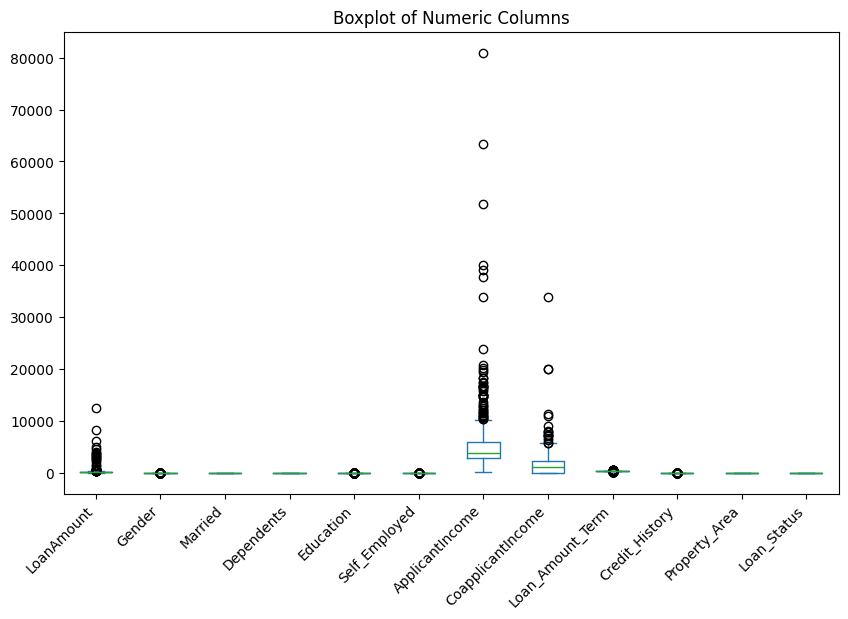

In [7]:
# prompt: Generate boxplot for all numeric columns to show outliers

import matplotlib.pyplot as plt

# Select only numeric columns for the boxplot
numeric_cols = data.select_dtypes(include=np.number)

# Create the boxplot
numeric_cols.plot(kind='box', figsize=(10, 6))
plt.title('Boxplot of Numeric Columns')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


**The code above generates the boxplot to highlight outliers for the numerical columns.**

In [8]:
# prompt: Treat the outliers for columns ApplicantIncome and CoapplicantIncome using IQR method

# Calculate IQR for ApplicantIncome
Q1_ApplicantIncome = data['ApplicantIncome'].quantile(0.25)
Q3_ApplicantIncome = data['ApplicantIncome'].quantile(0.75)
IQR_ApplicantIncome = Q3_ApplicantIncome - Q1_ApplicantIncome
lower_bound_ApplicantIncome = Q1_ApplicantIncome - 1.5 * IQR_ApplicantIncome
upper_bound_ApplicantIncome = Q3_ApplicantIncome + 1.5 * IQR_ApplicantIncome

# Treat outliers for ApplicantIncome
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] < lower_bound_ApplicantIncome, lower_bound_ApplicantIncome, data['ApplicantIncome'])
data['ApplicantIncome'] = np.where(data['ApplicantIncome'] > upper_bound_ApplicantIncome, upper_bound_ApplicantIncome, data['ApplicantIncome'])

# Calculate IQR for CoapplicantIncome
Q1_CoapplicantIncome = data['CoapplicantIncome'].quantile(0.25)
Q3_CoapplicantIncome = data['CoapplicantIncome'].quantile(0.75)
IQR_CoapplicantIncome = Q3_CoapplicantIncome - Q1_CoapplicantIncome
lower_bound_CoapplicantIncome = Q1_CoapplicantIncome - 1.5 * IQR_CoapplicantIncome
upper_bound_CoapplicantIncome = Q3_CoapplicantIncome + 1.5 * IQR_CoapplicantIncome

# Treat outliers for CoapplicantIncome
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] < lower_bound_CoapplicantIncome, lower_bound_CoapplicantIncome, data['CoapplicantIncome'])
data['CoapplicantIncome'] = np.where(data['CoapplicantIncome'] > upper_bound_CoapplicantIncome, upper_bound_CoapplicantIncome, data['CoapplicantIncome'])

#Now you can use the updated 'data' DataFrame


**With the above generated boxplot, this code is a step further to treat the outliers visible for two specific columns of ApplicantIncome and CoapplicantIncome.**

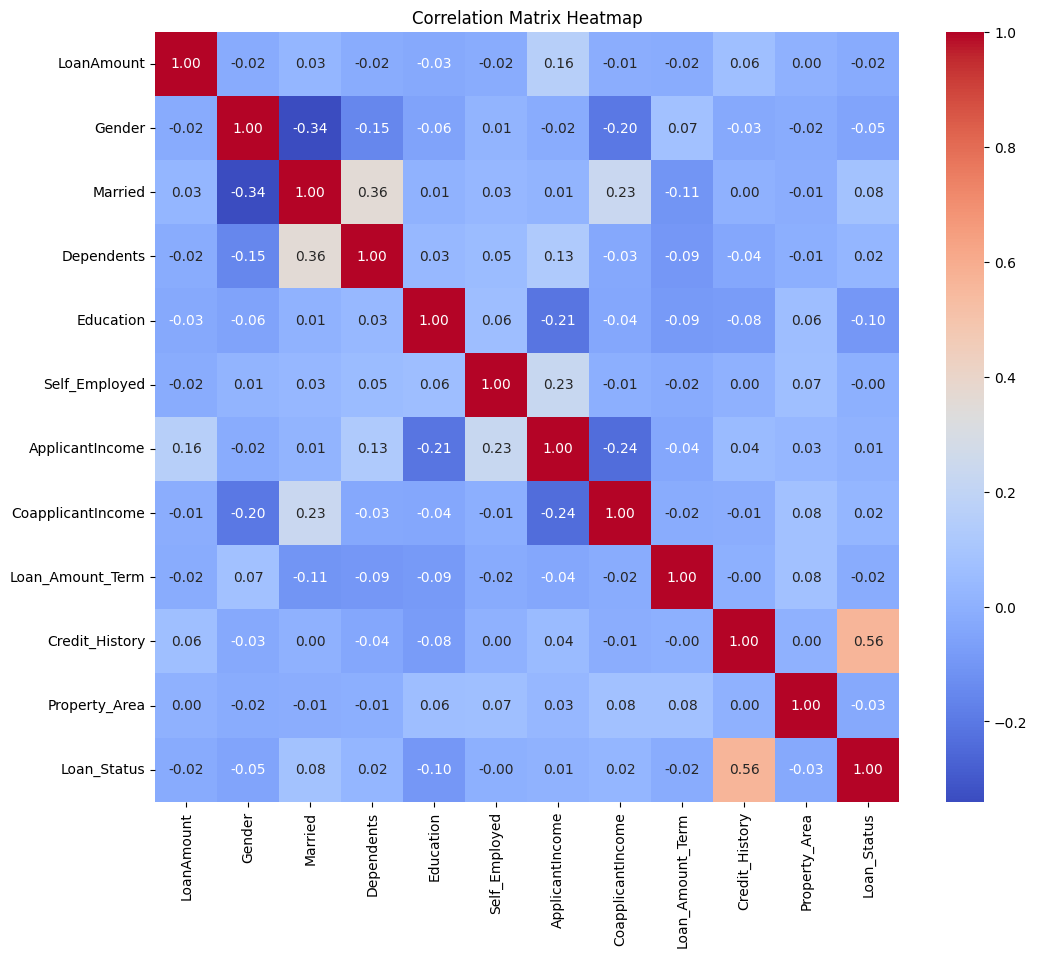

In [9]:
# prompt: Build correlation matrix using heatmap of all numeric columns

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Select only numeric features for correlation analysis
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


**This code depicts the correlation matrix for all the numeric columns in the form of heatmap.**

In [10]:
import statsmodels.api as sm

# Define dependent and independent variables
y = data['Loan_Status']
x = data.drop(columns=['Loan_ID', 'Loan_Status'],axis=1)


**The above code defines the dependent variable "y" and independent variable "x".**

In [11]:
# prompt: Derive logistic regression for 'x' and 'y' using statsmodel

# Convert categorical features to numerical using one-hot encoding
x = pd.get_dummies(x, drop_first=True)

# Add a constant to the independent variables
x = sm.add_constant(x)

# Fit the logistic regression model
log_reg = sm.Logit(y, x).fit()

# Print the model summary
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.459904
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  564
Model:                          Logit   Df Residuals:                      552
Method:                           MLE   Df Model:                           11
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.2640
Time:                        10:54:01   Log-Likelihood:                -259.39
converged:                       True   LL-Null:                       -352.43
Covariance Type:            nonrobust   LLR p-value:                 5.661e-34
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.6038      1.034     -1.550      0.121      -3.631       0.424
LoanAmou

**This code showcases the logistic regression for dependent and independent variables using the statsmodel, indicating whether the variable defined is significant or not based on the logistic regression results by comparing p-values of each of the variables with alpha value 0.05**

In [13]:
# Set the significance level (alpha)
alpha = 0.05

# Fit the logistic regression model first to get the initial result
model = sm.Logit(y, x)
result = model.fit()

# Get p-values from the model summary
p_values = result.pvalues

# Identify insignificant columns (p-value > alpha)
insignificant_cols = p_values[p_values > alpha].index

# Remove insignificant columns from the independent variables
x = x.drop(columns=insignificant_cols)

# Refit the model with the remaining columns
model = sm.Logit(y, x)
result = model.fit()

# Print the new model summary
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.459904
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.535687
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  564
Model:                          Logit   Df Residuals:                      563
Method:                           MLE   Df Model:                            0
Date:                Wed, 02 Apr 2025   Pseudo R-squ.:                  0.1427
Time:                        10:55:37   Log-Likelihood:                -302.13
converged:                       True   LL-Null:                       -352.43
Covariance Type:            nonrobust   LLR p-value:                       nan
                     coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------

**The code gives the regression output after removing all the insignificant variables, indicating the result for significant variable having p-value less than alpha value (0.05)**

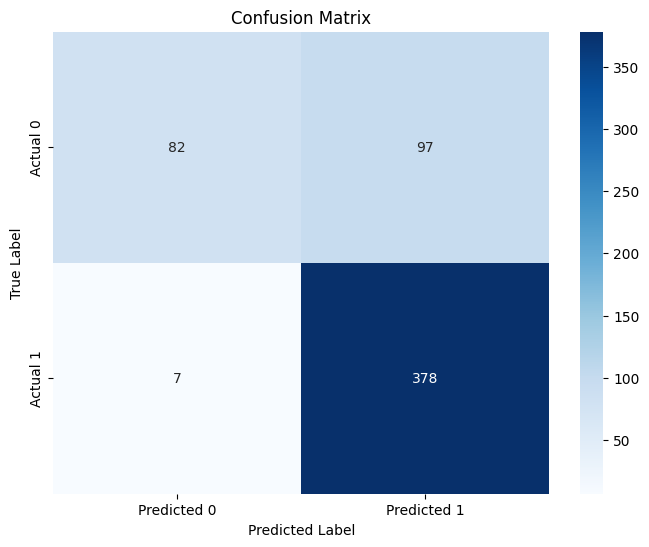

In [14]:
# prompt: Generate the confusion matrix, summarizing the performance of the classification model based on the regression results after removal of insignificant columns of the dataset

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y' is your true labels and 'result' is your refitted model

# Make predictions on the training data (you should ideally use a test set)
y_pred_prob = result.predict(x)
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to class labels (0 or 1)

# Create the confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


**This code is for generating the confusion matrix which summarizes the performance of the classification model based on the regression results by comparing predicted labels with true labels.**

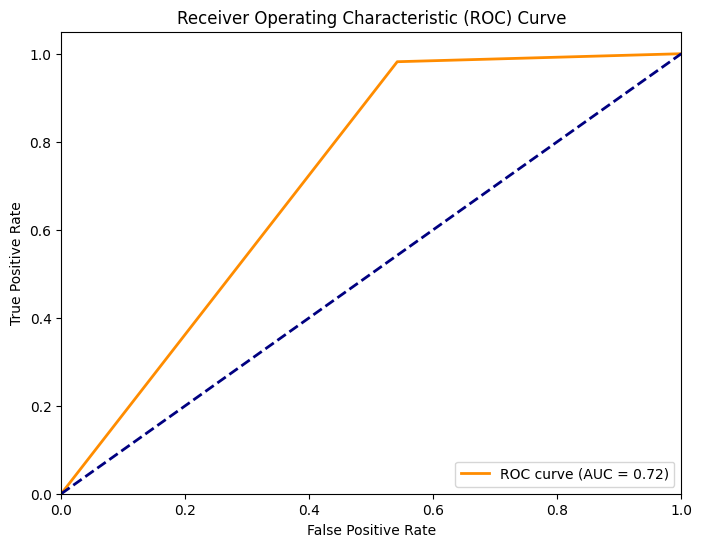

In [17]:
# prompt: Generate AUC with its related graph to measure the accuracy of the regression model implemented above for the dataset

from sklearn.metrics import roc_curve, auc

# Assuming 'y' is your true labels and 'y_pred_prob' is your predicted probabilities
fpr, tpr, thresholds = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


**This code depicts Area under Curve(AUC) which is the best tool to measure accuracy of the regression model and for this dataset AUC=0.72 which indicates that model is reliable as AUC is closer to 1.**